In [1]:
! pip install xlrd

In [35]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Date time conversion registration
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

# Prettier plotting with seaborn
sns.set(font_scale=1.5, style="whitegrid")

%matplotlib inline

## Read xlsx

In [36]:
# index has to be uniques values
df_c = pd.read_excel('C:/capes_sql/riuada/aca_riuada.xlsx',                                     
                                    skiprows=[0,1,2,3,4,5,6],
                                    parse_dates=['Data'],                                     
                                     )
df_c = df_c.drop(columns=['Unnamed: 0','Unnamed: 3','Unnamed: 5','Unnamed: 11','Unnamed: 12', 'Unnamed: 13', 'Unnamed: 14','Unnamed: 15', 'Unnamed: 16', 'Unnamed: 17','Unnamed: 18','Unnamed: 19','Unnamed: 20','Unnamed: 21','Unnamed: 22','Unnamed: 23','Unnamed: 24','Unnamed: 25'])                  

In [37]:
df_c.head(3)

,Data,Estació,Conca,UTM X,UTM Y,Variable,Mitjana,Unitat Mesura
0,2019-07-31,Aforament - Montblanc,EL FRANCOLÍ,347766,4580851,EA028_Montblanc_Cabal riu Francoli,0.0526,m³/s
1,2019-07-31,Aforament - Montblanc,EL FRANCOLÍ,347766,4580851,EA028_Montblanc_Nivell riu Francoli,0.0452,m
2,2019-08-01,Aforament - Montblanc,EL FRANCOLÍ,347766,4580851,EA028_Montblanc_Cabal riu Francoli,0.0553,m³/s


### Drop height values

In [38]:
# get names of indexes for which
height = df_c[ df_c['Unitat Mesura'] == 'm' ].index

In [39]:
df_c.drop(height, inplace = True)
df_c.tail()

,Data,Estació,Conca,UTM X,UTM Y,Variable,Mitjana,Unitat Mesura
160,2019-10-19,Aforament - Montblanc,EL FRANCOLÍ,347766,4580851,EA028_Montblanc_Cabal riu Francoli,0.037600,m³/s
162,2019-10-20,Aforament - Montblanc,EL FRANCOLÍ,347766,4580851,EA028_Montblanc_Cabal riu Francoli,0.064600,m³/s
164,2019-10-21,Aforament - Montblanc,EL FRANCOLÍ,347766,4580851,EA028_Montblanc_Cabal riu Francoli,0.064417,m³/s
166,2019-10-22,Aforament - Montblanc,EL FRANCOLÍ,347766,4580851,EA028_Montblanc_Cabal riu Francoli,1.252800,m³/s
168,2019-10-23,Aforament - Montblanc,EL FRANCOLÍ,347766,4580851,EA028_Montblanc_Cabal riu Francoli,0.000000,m³/s


In [40]:
df_c.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 85 entries, 0 to 168
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Data           85 non-null     datetime64[ns]
 1   Estació        85 non-null     object        
 2   Conca          85 non-null     object        
 3   UTM X          85 non-null     int64         
 4   UTM Y          85 non-null     int64         
 5   Variable       85 non-null     object        
 6   Mitjana        85 non-null     float64       
 7   Unitat Mesura  85 non-null     object        
dtypes: datetime64[ns](1), float64(1), int64(2), object(4)
memory usage: 6.0+ KB


In [41]:
df_c.describe()

,UTM X,UTM Y,Mitjana
count,85.0,85.0,85.000000
mean,347766.0,4580851.0,0.069892
std,0.0,0.0,0.131768
min,347766.0,4580851.0,0.000000
25%,347766.0,4580851.0,0.047600
50%,347766.0,4580851.0,0.054200
75%,347766.0,4580851.0,0.058900
max,347766.0,4580851.0,1.252800


In [42]:
#count no null values
df_c.dropna().count()

Data             85
Estació          85
Conca            85
UTM X            85
UTM Y            85
Variable         85
Mitjana          85
Unitat Mesura    85
dtype: int64

In [43]:
#count values
len(df_c)

85

In [44]:
#data as index
df_c = df_c.set_index('Data')
df_c.head(2)

,Estació,Conca,UTM X,UTM Y,Variable,Mitjana,Unitat Mesura
Data,,,,,,,
2019-07-31,Aforament - Montblanc,EL FRANCOLÍ,347766,4580851,EA028_Montblanc_Cabal riu Francoli,0.0526,m³/s
2019-08-01,Aforament - Montblanc,EL FRANCOLÍ,347766,4580851,EA028_Montblanc_Cabal riu Francoli,0.0553,m³/s


## Plot the data

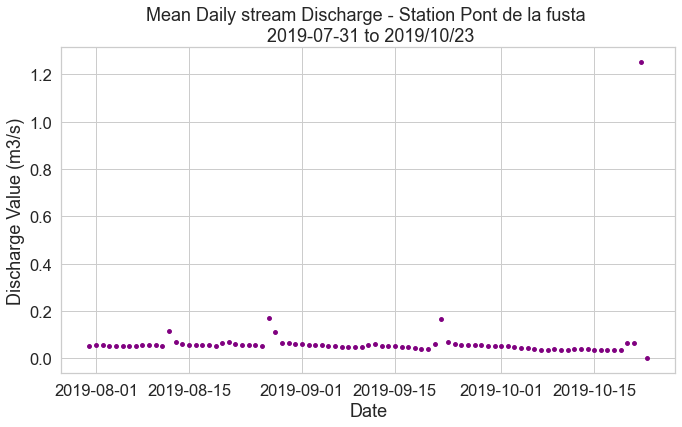

In [45]:
# Plot using matplotlib
fig, ax = plt.subplots(figsize=(11, 6))

ax.scatter(x=df_c.index,
           y=df_c["Mitjana"],
           marker="o",# o points x x marks
           s=15,#size markers
           color="purple",
           )

ax.set(xlabel="Date", ylabel="Discharge Value (m3/s)",
       title="Mean Daily stream Discharge - Station Pont de la fusta \n 2019-07-31 to 2019/10/23")

plt.show()